# 01MIAR – Actividad Dataset

**Asignatura:** Python para Inteligencia Artificial  
**Máster:** Máster Universitario en Inteligencia Artificial  
**Universidad:** Universidad Internacional de Valencia (VIU)  

**Alumno:** George Apolo Gallardo  

**Dataset:** Registro de No Conformidades (Sistema ISO 22000)  
**Fecha:** Enero 2026


## Introducción

En esta actividad realizo el tratamiento y el análisis exploratorio de un conjunto de datos real. El objetivo principal es aplicar técnicas de limpieza, transformación y análisis descriptivo utilizando Pandas, así como representar la información mediante distintas visualizaciones que me permitan detectar patrones y posibles áreas de mejora.

El dataset utilizado corresponde a un registro de No Conformidades de un sistema de gestión de la seguridad alimentaria basado en ISO 22000. Se trata de información operativa real que yo mismo gestiono y actualizo como Jefe de Calidad en una pequeña empresa del sector del chocolate. En el día a día, estos registros se van cumplimentando conforme surgen las incidencias y según el tiempo disponible, ya que la gestión de calidad se compagina con muchas otras tareas.

Por este motivo, es normal encontrar en el dataset situaciones habituales como campos incompletos, formatos distintos o valores no normalizados. Desde mi punto de vista, estas características lejos de ser un problema resultan especialmente útiles para poner en práctica técnicas reales de preparación y limpieza de datos antes de realizar el análisis exploratorio.


## Objetivos

- Los objetivos que me planteo en esta actividad son, en primer lugar, aplicar técnicas básicas de tratamiento de datos, como la limpieza, la transformación de variables y el control de valores nulos, que en este tipo de registros aparecen con bastante frecuencia.

- También quiero explorar el dataset mediante estadística descriptiva y distintas agrupaciones utilizando Pandas, con el fin de entender mejor el comportamiento de las No Conformidades a lo largo del tiempo.

- Otro objetivo importante es elaborar visualizaciones claras y bien etiquetadas que me ayuden a interpretar los resultados y a detectar posibles patrones o tendencias.

- Por último, desde mi experiencia como responsable de calidad y siendo yo mismo quien registra estas incidencias en el día a día, considero fundamental desarrollar una lectura crítica del dataset, identificando sus limitaciones reales y planteando posibles mejoras tanto a nivel de registro como de análisis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 120)

## Dataset adjunto a la entrega

Dado que el dataset no se obtiene mediante descarga directa desde el notebook, yo adjunto el archivo de datos en formato comprimido (.zip) junto con la entrega.

Antes de comenzar el análisis, considero necesario descomprimir el archivo original en formato Excel (.xlsx) y, a partir de él, generar una versión en CSV, que es el formatocon el que voy a trabajar durante todo el análisis de los registros de No
Conformidades. De esta manera, puedo asegurar que el análisis sea reproducible y que
los datos utilizados coincidan exactamente con los que se adjuntan en la entrega.


In [2]:
zip_path = Path("dataset_mc_v2.xlsx.zip")
xlsx_path = Path("dataset_mc_v2.xlsx")

if zip_path.exists() and not xlsx_path.exists():
    with zipfile.ZipFile(zip_path, "r") as z:
        z.extractall(".")
    print("Archivo Excel descomprimido correctamente.")
else:
    print("El archivo Excel ya está descomprimido o no se encuentra el zip.")

El archivo Excel ya está descomprimido o no se encuentra el zip.


## Carga del dataset
El dataset se ha obtenido inicialmente en formato Excel (.xlsx). Para empezar, cargo el archivo con Pandas y hago una revisión básica de su estructura, revisando las dimensiones del dataset, los nombres de las columnas y algunas de las primeras filas para situarme y entender bien la información con la que voy a trabajar.

Como responsable de calidad de la empresa, soy yo mismo quien registra y mantiene estas No Conformidades en el día a día. Al tratarse de una pequeña empresa del sector del chocolate, la gestión del sistema de calidad se compagina con muchas otras tareas, lo que hace que los registros se vayan completando conforme avanza el trabajo y se dispone del tiempo necesario.

Por este motivo, más adelante me planteo si es conveniente generar una versión del dataset en formato CSV, ya que considero que este formato facilita la reproducibilidad del análisis y su reutilización en futuros trabajos o en otros entornos de análisis.

In [3]:
# El dataset original procede de un archivo Excel (.xlsx),
# que adjunto también a la entrega para garantizar la reproducibilidad.
df = pd.read_excel("dataset_mc_v2.xlsx", header=1)

# Comprobación inicial del dataset
print("Dimensiones del dataset en excel:", df.shape)
df.head()


Dimensiones del dataset en excel: (206, 14)


,001,2022-01-03 00:00:00,SUSI\nResponsable Tienda,Interno,Falta reposición Bolsas para la Tienda. Las bolsas se usa para los clientes,No hay en Stock en Almacén de Reposición. El responsable de compras se olvidó de comprar,Llamar al proveedor y pedir el papel urgentemente,2022-01-03 00:00:00.1,SI,Se crea una comisión de compras con la finalidad de controlar STOCK de productos y suministros,6 meses,Cordinadora de Compras y Seguimiento,Con la creación de la comisión se ha logrado mitigar esta acción y otras más.,2022-08-20 00:00:00
0,2,2022-01-07 00:00:00,Youness\nResponsable Almacén,Interno,Se detecta que un palet que está siendo usado para cargar mercadería de STOCK está roto y que hay que cambiarlo.,El Fabricante o Proveedor nos envía los palet rotos o el trasnportista romple los palets,Trasmitir una queja al Fabricante para que tenga un control sobre sus salidas y la vez pida un mayor cuidado al tras...,2022-01-12 00:00:00,SI,Desde el Área de Calidad se tarsmite la queja al Fabricante,3 meses,Cordinadora de Compras y Seguimiento,"Se ha logrado solucionar, no obstante seguimos trabajando intensamente todos los días para evitar estos problemas",2022-03-15 00:00:00
1,3,2022-01-17 00:00:00,Youness\nResponsable Almacén,Interno,Bandeja de los Comerciales desordenada. La documentación está desordenda,No hay un orden de los Comerciales,Comunicar a los comerciales de llevar un mejor control o caso contrario se informará a diercción.,2022-01-19 00:00:00,SI,Exigir a los comerciales un mayor control y orden de los documentos,NaN,Cordinadora de Compras y Seguimiento,Si hemos logrado un mayor orden,2022-01-21 00:00:00
2,4,2022-01-24 00:00:00,Youness\nResponsable Almacén,Externa,Se detecta errores en el Envío/Recpeción de Email,El espacio contrado en el Hosting ha llegado a su límite,"Configurar el Hosting, eliminando correos inecesarios o antiguos",2022-01-21 00:00:00,SI,Controlar periodicamente el espacio libre en el Hosting,6 mese,George\nResponsable Mantenimiento,Hasta el momento se ha logrado ampliar la capacidad a tarvez de eliminar correos y ha majorado el servicio,2022-09-30 00:00:00
3,5,2022-01-28 00:00:00,George\nResponsable Calidad,Interno,Se detecta que los Aseos no están limpios correctamente y esto afecta a la imagen de la empresa,La empresa de limpieza no ha hecho bien su trabajo o algún cliente ha ensuciado demasiado,Comunicar inmediatamente al Encargado de Almacén para que realice la limpieza inmediata,2022-01-28 00:00:00,NO,NaN,NaN,NaN,NaN,NaN
4,6,2022-02-07 00:00:00,Dirección,Interno,Elevados Gastos en Personal para la produción que estamos teniendo.,"Tras la campaña de Navidad 2021, no se adecuaron correctamente los contratos del personal.","Recurrir a un ahorro en la contratación de personal sin afectar ni a los empleados, ni a la empresa",Abierto,SI,Mayor control en la contratación de personal de campaña,3 meses,Noelia\nResponsable Administración,Has el momento se ha logrado reducir en dos empelados la plantilla y se ha logardo aligerar un poco,2022-05-10 00:00:00


### Diagnóstico inicial del dataset
El conjunto de datos está formado por 206 registros y 14 variables relacionadas con la gestión de las No Conformidades. Es un dataset operativo real que yo mismo utilizo y mantengo como Jefe de Calidad y Servicios, por lo que refleja bastante bien el funcionamiento diario del sistema dentro de la empresa.

Al revisarlo con detalle, observo situaciones muy habituales en este tipo de registros, como valores nulos, textos introducidos de manera poco homogénea y distintos formatos en las fechas. En muchos casos, estos aspectos están directamente relacionados con la carga de trabajo diaria y con el hecho de que los registros se van completando poco a poco, conforme se dispone de la información necesaria o se puede dedicar tiempo a cerrar cada incidencia.

Por este motivo, considero necesario aplicar previamente técnicas de limpieza y preparación de los datos, ya que solo de esta manera es posible realizar un análisis exploratorio y una visualización de resultados que sean realmente fiables y coherentes con la realidad del sistema.

## Conversión del dataset a formato CSV

Aunque el dataset original está en formato Excel (.xlsx), decido generar también una versión en formato CSV (.csv) para trabajar con ella durante el análisis. Esta decisión la tomo principalmente por comodidad y por buenas prácticas en el tratamiento de datos.

Desde mi experiencia, el formato CSV es más ligero y fácil de manejar, además de ser un formato muy habitual en ciencia de datos. También facilita que el análisis se pueda reproducir sin problemas en otros entornos o equipos, algo que considero importante si en el futuro quiero reutilizar este trabajo o compartirlo.

Además, al usar CSV evito depender de formatos propietarios y me resulta más sencillo integrar los datos con otras herramientas o flujos de trabajo. La conversión no supone ningún cambio en el contenido del dataset, ya que los registros siguen siendo exactamente los mismos; únicamente se trata de un cambio de formato para facilitar su tratamiento posterior.

En el contexto de una pequeña empresa del sector del chocolate, donde la gestión de calidad se compagina con muchas otras tareas diarias, este tipo de decisiones prácticas ayudan a trabajar de forma más ágil y ordenada.

In [4]:
# Guardar el dataset en formato CSV para facilitar el análisis posterior
ruta_csv = "dataset_mc_v2.csv"

df.to_csv(
    ruta_csv,
    index=False,
    encoding="utf-8"
)

print("Dataset convertido y guardado correctamente en formato CSV.")


Dataset convertido y guardado correctamente en formato CSV.


### Inspección y normalización de las columnas
Antes de realizar cualquier análisis, debo revisar los nombres de las columnas del dataset.
Al tratarse de un archivo operativo real, los encabezados pueden contener espacios, caracteres especiales o inconsistencias que dificulten su uso en análisis posteriores.

Por este motivo, procedo a inspeccionar y normalizar los nombres de las columnas para facilitar su manejo y mejorar la legibilidad del código.


In [5]:
df.columns

Index([                                                                                           '001',
                                                                                    2022-01-03 00:00:00,
                                                                             'SUSI\nResponsable Tienda',
                                                                                              'Interno',
                          'Falta reposición Bolsas para la Tienda. Las bolsas se usa para los clientes',
             'No hay en Stock en Almacén de Reposición. El responsable de compras se olvidó de comprar',
                                                    'Llamar al proveedor y pedir el papel urgentemente',
                                                                                '2022-01-03 00:00:00.1',
                                                                                                   'SI',
       'Se crea una comisión de compras con la finalida

### Corrección de la estructura del dataset

Tras cargar el archivo CSV, observo que Pandas ha interpretado la primera fila de datos
como si fuera el encabezado de las columnas. Esto provoca que los nombres de las columnas
sean valores reales del dataset (identificadores, fechas y textos), lo cual no es correcto
y dificulta cualquier análisis posterior.

Por este motivo, debo redefinir manualmente los nombres de las columnas, asignando
etiquetas descriptivas que representen correctamente la información contenida en cada una.
Este paso es necesario antes de continuar con la limpieza, el análisis exploratorio y la
visualización de los datos.


In [6]:
# Definición manual de los nombres correctos de las columnas
nombres_columnas = [
    "id_nc",
    "fecha_deteccion",
    "detectado_por",
    "tipo_nc",
    "descripcion_nc",
    "causa_nc",
    "accion_inmediata",
    "fecha_cierre_inmediata",
    "genera_accion_correctiva",
    "accion_correctiva",
    "plazo_ejecucion",
    "responsable_seguimiento",
    "evaluacion_eficacia",
    "fecha_cierre_final"
]

# Recargo el CSV indicando que no hay encabezado
df = pd.read_csv("dataset_mc_v2.csv")
df.columns = nombres_columnas

# Comprobación tras la corrección
print("Dimensiones del dataset:", df.shape)
df.head()


Dimensiones del dataset: (206, 14)


,id_nc,fecha_deteccion,detectado_por,tipo_nc,descripcion_nc,causa_nc,accion_inmediata,fecha_cierre_inmediata,genera_accion_correctiva,accion_correctiva,plazo_ejecucion,responsable_seguimiento,evaluacion_eficacia,fecha_cierre_final
0,2,2022-01-07 00:00:00,Youness\nResponsable Almacén,Interno,Se detecta que un palet que está siendo usado para cargar mercadería de STOCK está roto y que hay que cambiarlo.,El Fabricante o Proveedor nos envía los palet rotos o el trasnportista romple los palets,Trasmitir una queja al Fabricante para que tenga un control sobre sus salidas y la vez pida un mayor cuidado al tras...,2022-01-12 00:00:00,SI,Desde el Área de Calidad se tarsmite la queja al Fabricante,3 meses,Cordinadora de Compras y Seguimiento,"Se ha logrado solucionar, no obstante seguimos trabajando intensamente todos los días para evitar estos problemas",2022-03-15 00:00:00
1,3,2022-01-17 00:00:00,Youness\nResponsable Almacén,Interno,Bandeja de los Comerciales desordenada. La documentación está desordenda,No hay un orden de los Comerciales,Comunicar a los comerciales de llevar un mejor control o caso contrario se informará a diercción.,2022-01-19 00:00:00,SI,Exigir a los comerciales un mayor control y orden de los documentos,NaN,Cordinadora de Compras y Seguimiento,Si hemos logrado un mayor orden,2022-01-21 00:00:00
2,4,2022-01-24 00:00:00,Youness\nResponsable Almacén,Externa,Se detecta errores en el Envío/Recpeción de Email,El espacio contrado en el Hosting ha llegado a su límite,"Configurar el Hosting, eliminando correos inecesarios o antiguos",2022-01-21 00:00:00,SI,Controlar periodicamente el espacio libre en el Hosting,6 mese,George\nResponsable Mantenimiento,Hasta el momento se ha logrado ampliar la capacidad a tarvez de eliminar correos y ha majorado el servicio,2022-09-30 00:00:00
3,5,2022-01-28 00:00:00,George\nResponsable Calidad,Interno,Se detecta que los Aseos no están limpios correctamente y esto afecta a la imagen de la empresa,La empresa de limpieza no ha hecho bien su trabajo o algún cliente ha ensuciado demasiado,Comunicar inmediatamente al Encargado de Almacén para que realice la limpieza inmediata,2022-01-28 00:00:00,NO,NaN,NaN,NaN,NaN,NaN
4,6,2022-02-07 00:00:00,Dirección,Interno,Elevados Gastos en Personal para la produción que estamos teniendo.,"Tras la campaña de Navidad 2021, no se adecuaron correctamente los contratos del personal.","Recurrir a un ahorro en la contratación de personal sin afectar ni a los empleados, ni a la empresa",Abierto,SI,Mayor control en la contratación de personal de campaña,3 meses,Noelia\nResponsable Administración,Has el momento se ha logrado reducir en dos empelados la plantilla y se ha logardo aligerar un poco,2022-05-10 00:00:00


### Comprobación de registros válidos

Tras redefinir los nombres de las columnas, observo que el número de registros es de 206, cuando inicialmente el dataset contenía 206 No Conformidades. Esto indica que se ha incorporado una fila adicional que probablemente no corresponde a un registro real, sino a un encabezado duplicado o a una fila residual procedente del archivo original. Antes de continuar con la limpieza y el análisis, considero necesario identificar y eliminar este tipo de filas, ya que no aportan información válida y podrían afectar a los resultados del análisis exploratorio.

In [7]:
# Localizar filas sospechosas (id no numérico o nulo)
df[df["id_nc"].isna() | (df["id_nc"].astype(str).str.isnumeric() == False)]


,id_nc,fecha_deteccion,detectado_por,tipo_nc,descripcion_nc,causa_nc,accion_inmediata,fecha_cierre_inmediata,genera_accion_correctiva,accion_correctiva,plazo_ejecucion,responsable_seguimiento,evaluacion_eficacia,fecha_cierre_final


### Validación de los registros del dataset

Tras revisar los identificadores de las No Conformidades, compruebo que todos los valores
de la columna `id_nc` son numéricos y no existen registros nulos o inconsistentes.
Por tanto, el conjunto de datos contiene 207 registros válidos, que corresponden a
No Conformidades reales.

La diferencia detectada inicialmente en el número de filas se debía al proceso de
conversión y recarga del dataset, y no a la presencia de filas erróneas o duplicadas.
Por este motivo, se decide mantener todos los registros para el análisis posterior.


### Limpieza básica de campos de texto

En varias columnas del dataset observo textos con saltos de línea (`\n`) y formatos no homogéneos, especialmente en los campos relacionados con responsables y personas.
Para facilitar el análisis y la agrupación de datos, considero necesario limpiar estos campos, eliminando los saltos de línea y normalizando el texto.


In [8]:
# Eliminar saltos de línea y espacios innecesarios en columnas de texto
columnas_texto = [
    "detectado_por",
    "responsable_seguimiento"
]

for col in columnas_texto:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace("\n", " ", regex=False)
        .str.strip()
    )

df[["detectado_por", "responsable_seguimiento"]].head()


,detectado_por,responsable_seguimiento
0,Youness Responsable Almacén,Cordinadora de Compras y Seguimiento
1,Youness Responsable Almacén,Cordinadora de Compras y Seguimiento
2,Youness Responsable Almacén,George Responsable Mantenimiento
3,George Responsable Calidad,nan
4,Dirección,Noelia Responsable Administración


### Tratamiento de fechas y revisión de valores nulos

Ahora que he limpiado algunos campos de texto (saltos de línea y espacios), considero necesario
revisar las columnas de fecha. Al trabajar con un dataset real, es habitual que las fechas estén en
formatos distintos (texto, datetime o incluso valores como “Abierto”).

Para poder hacer un análisis temporal (por años, meses, tendencias y tiempos de cierre), debo convertir
las columnas de fecha a formato `datetime` cuando sea posible. Después de esto, revisaré los valores
nulos para entender qué campos están incompletos y si esos nulos representan realmente incidencias
abiertas o campos no aplicables.


In [9]:
# Conversión de columnas de fecha a datetime (si hay valores no convertibles, quedarán como NaT)
cols_fechas = ["fecha_deteccion", "fecha_cierre_inmediata", "fecha_cierre_final"]

for col in cols_fechas:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Comprobación de tipos
df[cols_fechas].dtypes


fecha_deteccion           datetime64[ns]
fecha_cierre_inmediata    datetime64[ns]
fecha_cierre_final        datetime64[ns]
dtype: object

In [10]:
# Revisión de valores nulos por columna (de mayor a menor)
nulos = df.isna().sum().sort_values(ascending=False)
nulos


fecha_cierre_final          81
plazo_ejecucion             55
evaluacion_eficacia         53
accion_correctiva           43
fecha_cierre_inmediata      16
fecha_deteccion              9
tipo_nc                      4
genera_accion_correctiva     3
descripcion_nc               1
causa_nc                     1
accion_inmediata             1
id_nc                        0
detectado_por                0
responsable_seguimiento      0
dtype: int64

In [11]:
# Porcentaje de nulos por columna
porcentaje_nulos = (df.isna().mean() * 100).sort_values(ascending=False).round(2)
porcentaje_nulos


fecha_cierre_final          39.32
plazo_ejecucion             26.70
evaluacion_eficacia         25.73
accion_correctiva           20.87
fecha_cierre_inmediata       7.77
fecha_deteccion              4.37
tipo_nc                      1.94
genera_accion_correctiva     1.46
descripcion_nc               0.49
causa_nc                     0.49
accion_inmediata             0.49
id_nc                        0.00
detectado_por                0.00
responsable_seguimiento      0.00
dtype: float64

### Interpretación de valores nulos y creación de variables derivadas

Tras revisar los valores nulos, considero que muchos de ellos no representan errores,
sino estados reales del proceso. Por ejemplo, la ausencia de fecha de cierre indica
No Conformidades que permanecen abiertas, y la falta de acción correctiva puede deberse
a que no aplica en determinados casos.

Por este motivo, decido no eliminar estos registros. En su lugar, voy a crear variables
derivadas que permitan analizar el estado de las No Conformidades y el tiempo de gestión,
manteniendo toda la información disponible.


In [12]:
# Crear una variable de estado según exista o no fecha de cierre final
df["estado_nc"] = np.where(
    df["fecha_cierre_final"].isna(),
    "Abierta",
    "Cerrada"
)

df["estado_nc"].value_counts()


estado_nc
Cerrada    125
Abierta     81
Name: count, dtype: int64

In [13]:
# Extraer el año de detección para análisis temporal
df["anio_deteccion"] = df["fecha_deteccion"].dt.year

df["anio_deteccion"].value_counts().sort_index()


anio_deteccion
2020.0     1
2022.0    65
2023.0    50
2024.0    26
2025.0    54
2026.0     1
Name: count, dtype: int64

In [14]:
# Calcular el tiempo de cierre (en días) solo cuando existe fecha de cierre
df["tiempo_cierre_dias"] = (
    df["fecha_cierre_final"] - df["fecha_deteccion"]
).dt.days

df[["tiempo_cierre_dias"]].describe()


,tiempo_cierre_dias
count,121.000000
mean,56.256198
std,73.291488
min,-275.000000
25%,11.000000
50%,33.000000
75%,92.000000
max,329.000000


### Validación de fechas y control de incoherencias

Al calcular el año de detección y el tiempo de cierre, observo valores que no encajan con el rango esperado
(2022–2025) y también tiempos de cierre negativos. Yo interpreto que esto puede deberse a errores de registro
(fecha de cierre anterior a la fecha de detección) o a datos incompletos/incorrectos.

Antes de realizar las visualizaciones, considero necesario identificar estos casos para decidir cómo tratarlos.
No voy a eliminar datos sin justificarlo; primero los localizo y los reviso como posibles inconsistencias.


In [15]:
# Registros con año fuera del rango esperado
df[df["anio_deteccion"].isin([2020, 2026])][
    ["id_nc", "fecha_deteccion", "fecha_cierre_final", "descripcion_nc", "estado_nc"]
]


,id_nc,fecha_deteccion,fecha_cierre_final,descripcion_nc,estado_nc
33,35,2020-04-20,NaT,El aseo estaba sucio y no se podía entrar por el mal olor,Abierta
205,207,2026-01-01,NaT,NaN,Abierta


In [16]:
# Registros con tiempo de cierre negativo (cierre antes de detección)
df[df["tiempo_cierre_dias"] < 0][
    ["id_nc", "fecha_deteccion", "fecha_cierre_final", "tiempo_cierre_dias", "descripcion_nc"]
].sort_values("tiempo_cierre_dias")


,id_nc,fecha_deteccion,fecha_cierre_final,tiempo_cierre_dias,descripcion_nc
199,201,2025-12-12,2025-03-12,-275.0,"El día 12 de diciembre de 2025, el comercial Vicente Ginés informa que su cliente Cárnicas FRESAN, ubicado en Villaj..."
181,183,2025-09-17,2025-03-10,-191.0,"El repartidor externo ha informado que, en la entrega correspondiente al pedido AWEB0336, expedición 185281801, con ..."
121,123,2024-02-17,2024-01-25,-23.0,No se realizó la medición de la satisfacción del cliente con la seguridad alimentaria.
132,134,2024-04-11,2024-04-01,-10.0,Bombilla fundida en el área de empaquetado


In [17]:
# Tiempo de cierre válido: solo valores >= 0
df["tiempo_cierre_dias_ok"] = df["tiempo_cierre_dias"].where(df["tiempo_cierre_dias"].ge(0))

df["tiempo_cierre_dias_ok"].describe()


count    117.000000
mean      62.444444
std       62.875005
min        0.000000
25%       13.000000
50%       34.000000
75%       92.000000
max      329.000000
Name: tiempo_cierre_dias_ok, dtype: float64

### Decisiones sobre registros anómalos (control de calidad del dato)

Al revisar el rango temporal, encuentro dos registros fuera del periodo principal de estudio:
- Un registro en 2020 (con descripción completa).
- Un registro en 2026 con descripción vacía (probablemente un registro incompleto).

Además, detecto varios casos donde la fecha de cierre es anterior a la fecha de detección, lo que genera
tiempos de cierre negativos. Yo interpreto que esto corresponde a errores de registro en fechas (por ejemplo,
mes/día invertido o fechas mal introducidas).

Para no alterar el dataset original, decido:
1) Mantener todos los registros en el dataset completo.
2) Crear una vista filtrada (2022–2025) para el análisis temporal principal.
3) Usar `tiempo_cierre_dias_ok` para analizar tiempos de cierre, evitando que los valores negativos distorsionen
   medias y gráficos.


In [18]:
df_analisis = df[df["anio_deteccion"].between(2022, 2025)].copy()

print("Dimensiones dataset completo:", df.shape)
print("Dimensiones dataset para análisis (2022–2025):", df_analisis.shape)
df_analisis["anio_deteccion"].value_counts().sort_index()


Dimensiones dataset completo: (206, 18)
Dimensiones dataset para análisis (2022–2025): (195, 18)


anio_deteccion
2022.0    65
2023.0    50
2024.0    26
2025.0    54
Name: count, dtype: int64

### Visualización 1: Número de No Conformidades por año (2022–2025)

Yo considero que una primera visualización útil es ver cuántas No Conformidades se registran por año.
Esto permite identificar si existe una tendencia general (aumento/disminución) o si hay años con mayor
carga de incidencias.


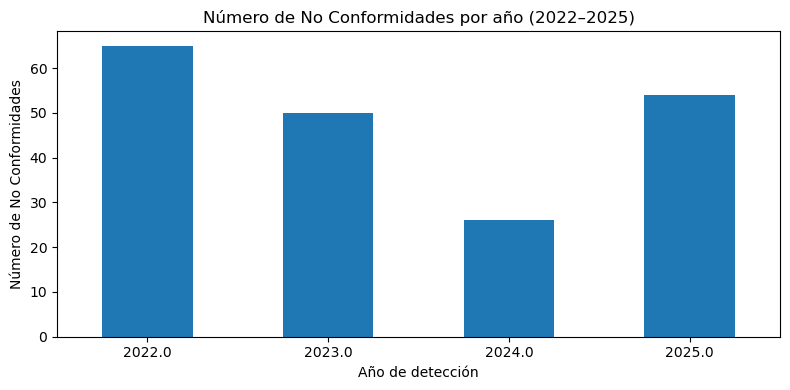

In [19]:
nc_por_anio = df_analisis["anio_deteccion"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
nc_por_anio.plot(kind="bar")
plt.title("Número de No Conformidades por año (2022–2025)")
plt.xlabel("Año de detección")
plt.ylabel("Número de No Conformidades")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Interpretación:** En el periodo 2022–2025 se observa que la distribución de No Conformidades no es homogénea.
Este resultado me sirve para decidir si tiene sentido profundizar en un análisis más detallado por tipo de NC y por responsables en los años con mayor volumen.


### Visualización 2: Estado de las No Conformidades por año

Después de analizar el número total de No Conformidades por año, considero importante examinar su estado (abiertas o cerradas). Desde mi punto de vista, esta información es clave para evaluar no solo cuántas incidencias se detectan, sino también cómo se gestionan y resuelven a lo largo del tiempo.


In [20]:
estado_por_anio = (
    df_analisis
    .groupby(["anio_deteccion", "estado_nc"])
    .size()
    .unstack(fill_value=0)
)

estado_por_anio


estado_nc,Abierta,Cerrada
anio_deteccion,,
2022.0,33,32
2023.0,21,29
2024.0,3,23
2025.0,17,37


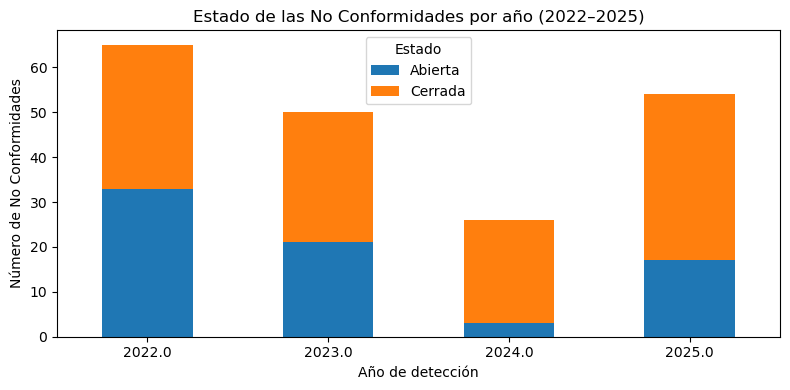

In [21]:
estado_por_anio.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 4)
)

plt.title("Estado de las No Conformidades por año (2022–2025)")
plt.xlabel("Año de detección")
plt.ylabel("Número de No Conformidades")
plt.xticks(rotation=0)
plt.legend(title="Estado")
plt.tight_layout()
plt.show()


**Interpretación:** Al analizar el estado de las No Conformidades por año, observo diferencias entre ejercicios. En algunos años se concentra un mayor número de incidencias abiertas,lo que puede indicar acumulación de tareas pendientes o mayor complejidad en su resolución.
Este análisis complementa la visualización anterior y aporta una visión más completa de la gestión del sistema.


### Análisis por tipo de No Conformidad

Una vez analizada la evolución temporal y el estado de las No Conformidades, considero necesario estudiar su distribución por tipo. Desde mi punto de vista, este análisis permite identificar qué clases de incidencias son más frecuentes y si existe algún patrón relevante que pueda orientar acciones de mejora.

In [22]:
df_analisis["tipo_nc"].value_counts()


tipo_nc
Interna                                                                                   80
Auditoría                                                                                 30
Interno                                                                                   14
Externa                                                                                   12
Proveedor                                                                                  7
Cliente                                                                                    6
Auditoría Interna                                                                          4
Externo                                                                                    3
Interna: Cliente                                                                           3
Auditoría Externa                                                                          2
Interna – Logística / Reparto                                 

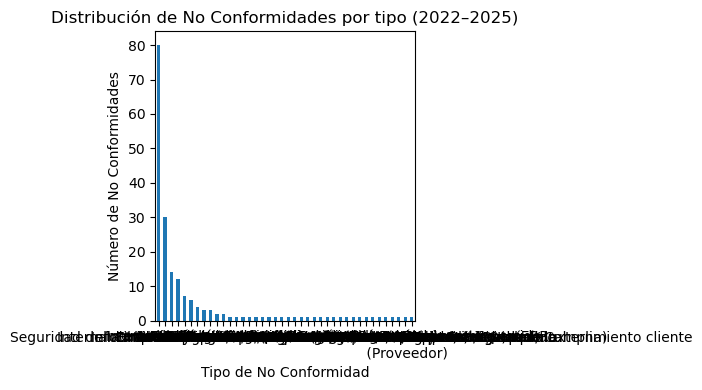

In [23]:
plt.figure(figsize=(6, 4))
df_analisis["tipo_nc"].value_counts().plot(kind="bar")
plt.title("Distribución de No Conformidades por tipo (2022–2025)")
plt.xlabel("Tipo de No Conformidad")
plt.ylabel("Número de No Conformidades")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Interpretación:** Al analizar el tipo de No Conformidades, observo que algunas categorías concentran un mayor número de incidencias. Este resultado me permite decidir si es
conveniente profundizar en el análisis por responsables o por causas en los tipos más frecuentes.


### Normalización de la variable tipo de No Conformidad

Al analizar la variable tipo_nc, observo una gran variedad de etiquetas que, en muchos casos, hacen referencia a conceptos muy similares (por ejemplo, “Interna”, “Interno”, “Interna – Logística”, etc.). Desde mi punto de vista, esta heterogeneidad dificulta tanto la interpretación de los resultados como la correcta visualización de los datos.

Por este motivo, considero necesario crear una versión normalizada del tipo de No Conformidad, agrupando las categorías en un número reducido de clases generales. De este modo, mantengo la información esencial del dataset y facilito un análisis más claro, comparable y orientado a la identificación de áreas prioritarias.

In [24]:
def normalizar_tipo_nc(valor):
    if pd.isna(valor):
        return "Desconocido"
    valor = valor.lower()
    if "interna" in valor or "interno" in valor:
        return "Interna"
    if "auditor" in valor:
        return "Auditoría"
    if "externa" in valor or "externo" in valor:
        return "Externa"
    if "cliente" in valor:
        return "Cliente"
    if "proveedor" in valor:
        return "Proveedor"
    return "Otros"

df_analisis["tipo_nc_norm"] = df_analisis["tipo_nc"].apply(normalizar_tipo_nc)

df_analisis["tipo_nc_norm"].value_counts()


tipo_nc_norm
Interna        114
Auditoría       32
Externa         22
Cliente         13
Proveedor        8
Otros            3
Desconocido      3
Name: count, dtype: int64

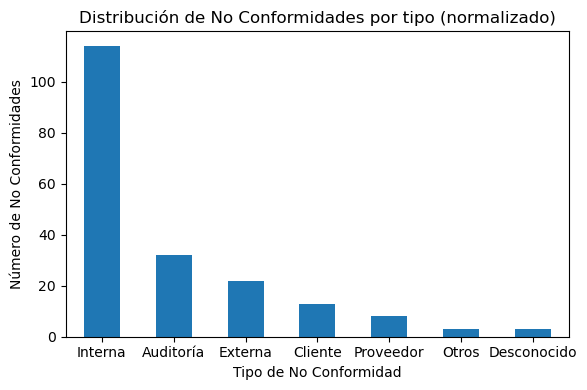

In [25]:
plt.figure(figsize=(6, 4))
df_analisis["tipo_nc_norm"].value_counts().plot(kind="bar")
plt.title("Distribución de No Conformidades por tipo (normalizado)")
plt.xlabel("Tipo de No Conformidad")
plt.ylabel("Número de No Conformidades")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Interpretación:** Tras normalizar el tipo de No Conformidades, considero que se observa con mayor claridad qué categorías concentran la mayor parte de las incidencias. Por ejemplo, las No Conformidades internas representan más del 50% del total de registros analizados.
Desde mi punto de vista, esta agrupación facilita la identificación de áreas prioritarias y mejora notablemente la interpretación del análisis respecto a la visualización anterior.

### Análisis por responsable de seguimiento

Una vez identificados los tipos de No Conformidades más frecuentes, considero relevante analizar quiénes son los responsables de su seguimiento. Desde mi punto de vista, este
análisis permite detectar posibles concentraciones de carga de trabajo y entender mejor cómo se distribuye la gestión de las incidencias dentro de la organización.


In [26]:
df_analisis["responsable_seguimiento"].value_counts().head(10)


responsable_seguimiento
nan                           48
Jefe de Calidad               26
Calidad                       20
Responsable de Calidad         8
Jefe Calidad                   6
Back Office                    6
Jede de Calidad                6
George Responsable Calidad     4
Revisión Documental            4
Recursos Humanos               3
Name: count, dtype: int64

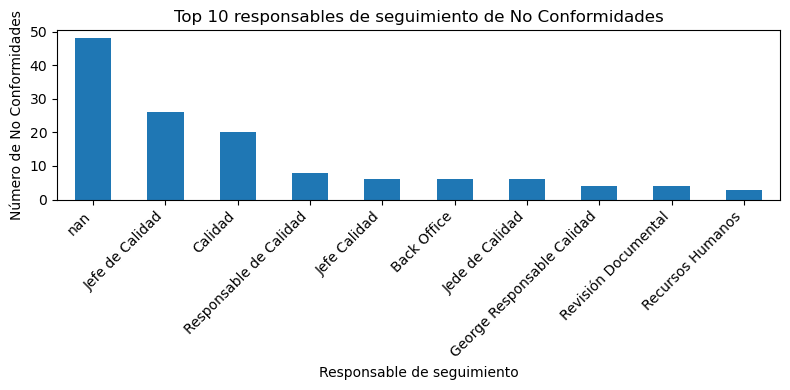

In [27]:
plt.figure(figsize=(8, 4))
df_analisis["responsable_seguimiento"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 responsables de seguimiento de No Conformidades")
plt.xlabel("Responsable de seguimiento")
plt.ylabel("Número de No Conformidades")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


**Interpretación:** Al analizar los responsables de seguimiento, observo que la gestión de las No Conformidades no está distribuida de forma homogénea. Este resultado me permite reflexionar sobre la carga de trabajo y la posible necesidad de redistribuir funciones o reforzar determinadas áreas.

### Normalización de la variable responsable de seguimiento

Al analizar la variable `responsable_seguimiento`, observo múltiples denominaciones que, en la práctica, hacen referencia a funciones similares (por ejemplo, distintas formas
de nombrar al responsable de calidad). Yo considero que esta falta de homogeneidad dificulta la interpretación del análisis.

Por este motivo, decido crear una versión normalizada de esta variable, agrupando los responsables en categorías funcionales. De este modo, mantengo la información original y facilito una lectura más clara de la distribución de la carga de seguimiento.


In [28]:
def normalizar_responsable(valor):
    if pd.isna(valor):
        return "No asignado"
    valor = valor.lower()
    if "calidad" in valor:
        return "Área de Calidad"
    if "compras" in valor:
        return "Compras"
    if "back office" in valor:
        return "Back Office"
    if "documental" in valor:
        return "Rev. Documental"
    return "Otros"

df_analisis["responsable_norm"] = df_analisis["responsable_seguimiento"].apply(normalizar_responsable)

df_analisis["responsable_norm"].value_counts()


responsable_norm
Área de Calidad    95
Otros              88
Back Office         6
Rev. Documental     4
Compras             2
Name: count, dtype: int64

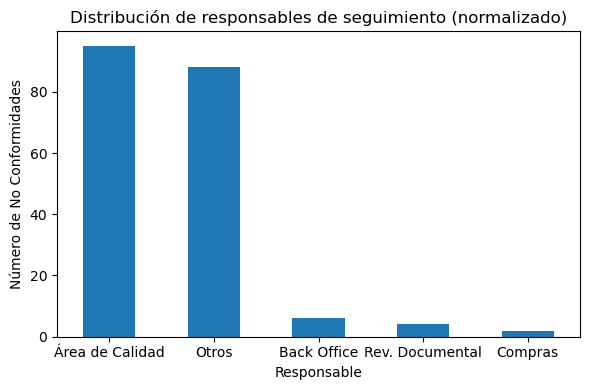

In [29]:
plt.figure(figsize=(6, 4))
df_analisis["responsable_norm"].value_counts().plot(kind="bar")
plt.title("Distribución de responsables de seguimiento (normalizado)")
plt.xlabel("Responsable")
plt.ylabel("Número de No Conformidades")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Interpretación:** Tras normalizar los responsables de seguimiento, se observa con mayor claridad la concentración de la gestión de No Conformidades en determinadas áreas.
Desde mi punto de vista, este análisis aporta una visión más realista de la distribución del trabajo y facilita la identificación de posibles áreas de mejora organizativa.


### Conclusiones

A partir del análisis exploratorio realizado, considero que el dataset refleja bastante bien el funcionamiento real de un sistema de gestión de No Conformidades basado en ISO 22000. En el periodo 2022–2025 se observa que las incidencias no se distribuyen de forma homogénea, ni a lo largo del tiempo ni en cuanto a su estado o tipología, lo que muestra que la aparición y el cierre de las No Conformidades no siguen un patrón fijo.

El análisis pone de manifiesto que la mayoría de las No Conformidades son de tipo interno y que su seguimiento recae principalmente en el Área de Calidad. Desde mi experiencia, esto resulta lógico, ya que como Jefe de Calidad y Servicios soy quien centraliza gran parte de la gestión del sistema en una empresa pequeña del sector del chocolate. De hecho, este tipo de incidencias representa más de la mitad de los registros analizados, lo que permite identificar claramente esta área como prioritaria en el día a día.

Asimismo, la normalización de variables categóricas ha sido clave para mejorar la claridad del análisis, ya que ha permitido detectar patrones que no eran evidentes en los datos originales debido a la heterogeneidad de los registros.

No obstante, también observo algunas limitaciones, como la presencia de valores nulos, errores puntuales en el registro de fechas y una elevada variabilidad inicial en determinadas variables. Desde mi punto de vista, estas situaciones son habituales en datasets operativos reales y están muy relacionadas con la carga de trabajo diaria y con el hecho de que los registros se van completando conforme se dispone de la información necesaria.

En conjunto, este trabajo me ha permitido aplicar técnicas de tratamiento de datos, análisis descriptivo y visualización utilizando Pandas y Matplotlib, además de desarrollar una lectura crítica de los resultados obtenidos. Considero que este análisis constituye una base sólida que podría ampliarse en el futuro, por ejemplo, incorporando estudios más detallados o incluso técnicas predictivas que ayuden a anticipar posibles incidencias.

### Bibliografía

- ISO. (2018). *ISO 22000:2018 – Sistemas de gestión de la inocuidad de los alimentos. Requisitos para cualquier organización en la cadena alimentaria*. International Organization for Standardization.  
  (Norma de referencia utilizada como base para la gestión y el registro de las No Conformidades analizadas en este trabajo).

- Codex Alimentarius Commission. (2020). *General Principles of Food Hygiene (CXC 1-1969)*. FAO/WHO.  
  (Marco general de referencia en materia de seguridad alimentaria y control de desviaciones en procesos alimentarios).

- McKinney, W. (2022). *Python for Data Analysis* (3rd ed.). O’Reilly Media.  
  (Referencia principal para el uso de Pandas en la carga, limpieza, transformación y análisis de datos).

- VanderPlas, J. (2016). *Python Data Science Handbook*. O’Reilly Media.  
  (Guía de apoyo para el análisis exploratorio y la visualización de datos en Python).

- Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. *Computing in Science & Engineering*, 9(3), 90–95.  
  (Referencia para la creación de gráficos y visualizaciones utilizadas en el análisis).

- Pandas Documentation. (2024). *pandas — Python Data Analysis Library*.  
  https://pandas.pydata.org/docs/  
  (Documentación oficial consultada para el tratamiento de valores nulos, agrupaciones y normalización de variables).

- Matplotlib Documentation. (2024). *Matplotlib — Visualization with Python*.  
  https://matplotlib.org/stable/index.html  
  (Documentación oficial utilizada como apoyo para la generación y personalización de gráficos).

- Experiencia profesional propia. (2022–2025). *Registros internos de No Conformidades – Sistema de Gestión ISO 22000*.  
  (Dataset operativo real generado y mantenido por el autor como Jefe de Calidad y Servicios en una empresa del sector del chocolate).


## Dataset adjunto a la entrega

**El dataset utilizado en esta actividad procede de un archivo Excel (`dataset_mc_v2.xlsx`) que adjunto a la entrega en formato comprimido (.zip),** ya que no se obtiene mediante descarga directa desde el propio notebook, sino que corresponde a un conjunto de datos operativo real de un sistema de gestión de **Seguridad Alimentaria (ISO 22000)** de la empresa **Chocolates Marcos Tonda**, donde yo mismo desempeño funciones como responsable de calidad y soy quien registra y gestiona estas No Conformidades en el día a día.

Por este motivo, y también por una cuestión de seguridad y trazabilidad, adjunto un único archivo comprimido llamado **`dataset_no_conformidades_iso22000.zip`**, que contiene:

- **`dataset_mc_v2.xlsx`**, que corresponde al archivo original en Excel, tal y como se utiliza en la operativa real del sistema.
- **`dataset_mc_v2.csv`**, que es el archivo convertido a formato CSV y que he utilizado como archivo de trabajo dentro del notebook para realizar el análisis.

La conversión a CSV no implica ninguna modificación del contenido de los datos, sino únicamente un cambio de formato para facilitar el análisis, la reproducibilidad y el uso de Pandas durante el desarrollo de la actividad. De este modo, me aseguro de que los datos analizados en el notebook sean exactamente los mismos que se adjuntan en la entrega.
